##  <span style= "color:blue">IEE065 - Análise de Sobrevivência e Confiabilidade
#### Aluno: João Claudio da Silva Araujo Lobato
##### Amazoneida Sá Peixoto Pinheiro - Professora Associada do Depto. Estatística - UFAM
### Aula 09: Tópico III: Estimação não Paramétrica
#### Data: 10/02/2022

##  <span style= "color:red">Exercícios de Revisão
    
    * Na Aula de hoje faremos exercícios de aplicação da teoria dos tópicos I, II e III

##### Exercício: Livro Enrico, cap-2, ex-2

    * Os dados mostrados abaixo representam o tempo at ́e a ruptura de um tipo de isolante el ́etrico sujeito a uma tensa ̃o de estresse de 35 Kvolts. O teste consistiu em deixar 25 destes isolantes funcionando at ́e que 15 deles falhassem (censura do tipo II) obtendo-se os seguintes resultados (em minutos)::

      0,19   0,78   0,96   1,31   2,78   3,16   4,67   4,85   6,50   7,35    8,27             12,07   32,52   33,91   36,71

A partir destes dados amostrais, deseja-se obter as seguintes informações:

        (a)  estimativas  para a Sobrevivência por KM e NA;
        
  $\hat{S}_{km}(0.19)=?$
        
  $\hat{S}_{km}(0.78)=?$
        
        ....
        
  $\hat{S}_{km}(36.71)=?$


        (b) uma estimativa (pontual e intervalar) para a fração de defeituosos esperada             nos dois primeiros minutos de funcionamento;
        
$1-\hat{S}_{km}(2.0)=$

        (c) uma estimativa (pontual) para o tempo médio de vida destes  isoladores                   funcionando a 35 Kvolts (limitado em 40 minutos);uma estimativa para o tempo             mediano de vida deste tipo de isolante elétrico funcionando a 35 Kvolts;

        (d) o tempo necessário para 20% dos isolantes estarem fora de operação.

In [8]:
tempos<-c(0.19 ,  0.78,   0.96,   1.31,   2.78,   3.16,   4.67,   4.85,   6.50,   7.35,    8.27,     12.07 ,  32.52,   33.91,   36.71,36.71,36.71,36.71,36.71,36.71,36.71,36.17,36.71,36.71,36.71)

In [10]:
cens<-c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0)

In [11]:
require(survival)
Surv(tempos,cens)

 [1]  0.19   0.78   0.96   1.31   2.78   3.16   4.67   4.85   6.50   7.35 
[11]  8.27  12.07  32.52  33.91  36.71  36.71+ 36.71+ 36.71+ 36.71+ 36.71+
[21] 36.71+ 36.17+ 36.71+ 36.71+ 36.71+

In [20]:
# Estimativas da Sobrevivência por KM dos isolantes elétricos
KMi<-survfit(Surv(tempos,cens)~1)

In [21]:
summary(KMi)

Call: survfit(formula = Surv(tempos, cens) ~ 1)

  time n.risk n.event survival std.err lower 95% CI upper 95% CI
  0.19     25       1    0.960  0.0392        0.886        1.000
  0.78     24       1    0.920  0.0543        0.820        1.000
  0.96     23       1    0.880  0.0650        0.761        1.000
  1.31     22       1    0.840  0.0733        0.708        0.997
  2.78     21       1    0.800  0.0800        0.658        0.973
  3.16     20       1    0.760  0.0854        0.610        0.947
  4.67     19       1    0.720  0.0898        0.564        0.919
  4.85     18       1    0.680  0.0933        0.520        0.890
  6.50     17       1    0.640  0.0960        0.477        0.859
  7.35     16       1    0.600  0.0980        0.436        0.826
  8.27     15       1    0.560  0.0993        0.396        0.793
 12.07     14       1    0.520  0.0999        0.357        0.758
 32.52     13       1    0.480  0.0999        0.319        0.722
 33.91     12       1    0.440  0.0993   

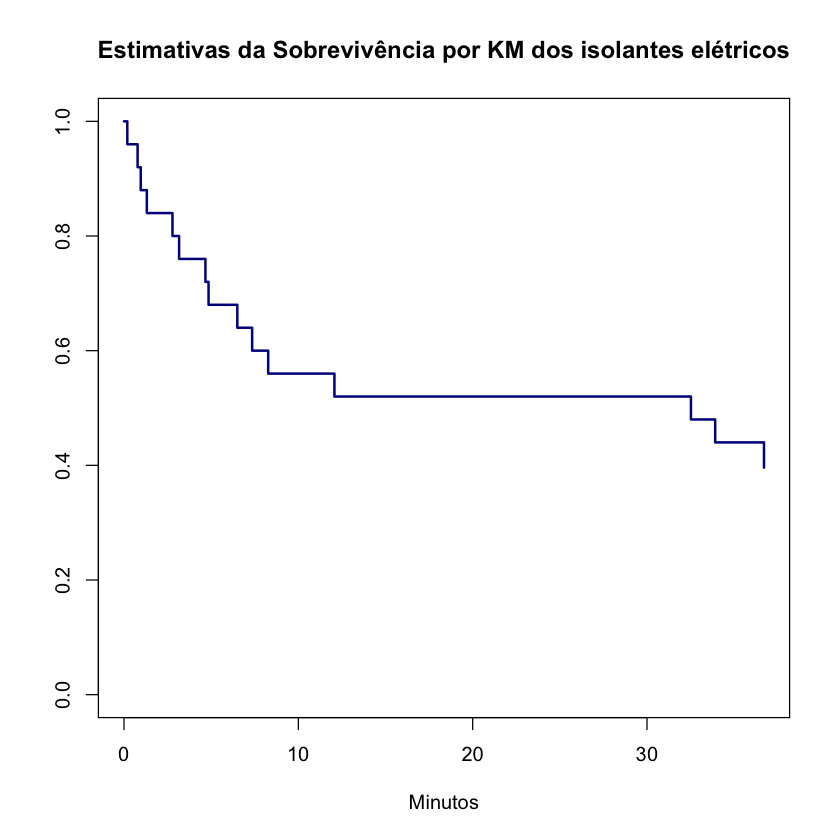

In [17]:
plot(KMi, conf.int=F, col="darkblue",lwd=2,main="Estimativas da Sobrevivência por KM dos isolantes elétricos", xlab="Minutos")

In [24]:
#  Códigos no R para o cálculo do Tempo médio

tempos[cens==1]
tj<-c(0,as.numeric(levels(as.factor(t))))
surv<-c(1,as.numeric(levels(as.factor(KMi$surv))))
surv<-sort(surv, decreasing=T)
k<-length(tj)-1
prod<-matrix(0,k,1)
   for(j in 1:k){
        prod[j]<-(tj[j+1]-tj[j])*surv[j]
}
tm<-sum(prod) 
tm


[1]  0.19  0.78  0.96  1.31  2.78  3.16  4.67  4.85  6.50  7.35  8.27 12.07
[13] 32.52 33.91 36.71

[1] 20.9252

        * Tempo médio de vida dos isolantes elétricos = 20,9252 minutos